<a href="https://colab.research.google.com/github/SKandar-1/COVID19-Vaccine-Sentiment-Analysis-/blob/main/CovVacSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19 Vaccine Sentiment Analysis on Tweets**


In [1]:
# Import necessary libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Upload Twitter APT login file to google colab
from google.colab import files
uploaded = files.upload()

Saving login.csv to login.csv


In [5]:
# Store the data
log = pd.read_csv('login.csv')

In [6]:
# Get the twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [7]:
# Create the Authentication Object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
# Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [8]:
# Gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#COVID19vaccines -filter:retweets'



In [9]:
# Create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2020-11-03', tweet_mode='extended').items(5000)


In [10]:
# Store the tweets in a variable
all_tweets = [tweet.full_text for tweet in tweets]

In [11]:
# Cerate a DataFrame to store the tweets in a column called 'Tweets'
Covid_df = pd.DataFrame(all_tweets, columns = ['Tweets'])
# Show the first six rows of DataFrame
Covid_df.head(6)

,Tweets
0,"On #Thursday, PWHD #MobileVaccineClinic is bri..."
1,Renfrew 12+ 1st and 2nd dose\n\nJuly 28 from 1...
2,.@nytimes @DLeonhardt: A confusing message \n\...
3,Do you have questions Thinking faceabout the #...
4,#Covid19vaccines \n\nThis work aim at evaluati...
5,#Delhi | GDP now stands for #Gas_Diesel-Petrol...
6,Think of your #COVID19 #vaccine like a very go...
7,#NSTnation Datuk Saarani Mohamad said there sh...
8,"the coverage of #COVID19Vaccines, there is sub..."
9,The World Economic Forum recently introduced t...


In [12]:
# Create a function to clean the Tweets
def CleanTwt(twt):
  twt = re.sub('#COVID19vaccines', 'COVID19vaccines', twt) #removes the '#' from COVID19vaccines
  twt = re.sub('#COVID19Vaccines', 'COVID19Vaccines', twt) #removes the '#' from COVID19Vaccines
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any string with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [39]:
# Clean the Tweets
Covid_df['Cleaned_tweets'] = Covid_df['Tweets'].apply(CleanTwt)
# Show the first six rows of the DataFrame
Covid_df.head(6)

,Tweets,Cleaned_tweets,Subjectivity,Polarity,Sentiment
0,"On #Thursday, PWHD #MobileVaccineClinic is bri...","On , PWHD is bringing and vaccines to . Mob...",0.000000,0.0,Neutral
1,Renfrew 12+ 1st and 2nd dose\n\nJuly 28 from 1...,Renfrew 12+ 1st and 2nd doseJuly 28 from 12pm-...,0.000000,0.0,Neutral
2,.@nytimes @DLeonhardt: A confusing message \n\...,.@nytimes @DLeonhardt: A confusing message ...,0.400000,-0.3,Negative
3,Do you have questions Thinking faceabout the #...,Do you have questions Thinking faceabout the C...,0.000000,0.0,Neutral
4,#Covid19vaccines \n\nThis work aim at evaluati...,This work aim at evaluating the immunogenicit...,0.600000,0.0,Neutral
5,#Delhi | GDP now stands for #Gas_Diesel-Petrol...,| GDP now stands for _Diesel-Petrol; the gove...,0.066667,0.0,Neutral


In [14]:
# Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
# Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

# Create two new columns called 'Subjectivity' and 'Polarity'
Covid_df['Subjectivity'] = Covid_df['Cleaned_tweets'].apply(getSubjectivity)
Covid_df['Polarity'] = Covid_df['Cleaned_tweets'].apply(getPolarity)
Covid_df.head()

,Tweets,Cleaned_tweets,Subjectivity,Polarity
0,"On #Thursday, PWHD #MobileVaccineClinic is bri...","On , PWHD is bringing and vaccines to . Mob...",0.0,0.0
1,Renfrew 12+ 1st and 2nd dose\n\nJuly 28 from 1...,Renfrew 12+ 1st and 2nd doseJuly 28 from 12pm-...,0.0,0.0
2,.@nytimes @DLeonhardt: A confusing message \n\...,.@nytimes @DLeonhardt: A confusing message ...,0.4,-0.3
3,Do you have questions Thinking faceabout the #...,Do you have questions Thinking faceabout the C...,0.0,0.0
4,#Covid19vaccines \n\nThis work aim at evaluati...,This work aim at evaluating the immunogenicit...,0.6,0.0


In [15]:
# Createa function to get the sentiment text
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [16]:
# Create a column to store the text sentiment
Covid_df['Sentiment'] = Covid_df['Polarity'].apply(getSentiment)

# Show the first six rows of the DataFrame
Covid_df.head()

,Tweets,Cleaned_tweets,Subjectivity,Polarity,Sentiment
0,"On #Thursday, PWHD #MobileVaccineClinic is bri...","On , PWHD is bringing and vaccines to . Mob...",0.0,0.0,Neutral
1,Renfrew 12+ 1st and 2nd dose\n\nJuly 28 from 1...,Renfrew 12+ 1st and 2nd doseJuly 28 from 12pm-...,0.0,0.0,Neutral
2,.@nytimes @DLeonhardt: A confusing message \n\...,.@nytimes @DLeonhardt: A confusing message ...,0.4,-0.3,Negative
3,Do you have questions Thinking faceabout the #...,Do you have questions Thinking faceabout the C...,0.0,0.0,Neutral
4,#Covid19vaccines \n\nThis work aim at evaluati...,This work aim at evaluating the immunogenicit...,0.6,0.0,Neutral


In [36]:
# Check the shape of the DataFrame
Covid_df.shape

(629, 5)

In [35]:
# Check for duplicate rows in the DataFrame
Covid_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
624    False
625    False
626    False
627    False
628    False
Length: 629, dtype: bool

In [38]:
# Check for null values in the DataFrame
Covid_df.isnull()

,Tweets,Cleaned_tweets,Subjectivity,Polarity,Sentiment
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
624,False,False,False,False,False
625,False,False,False,False,False
626,False,False,False,False,False
627,False,False,False,False,False


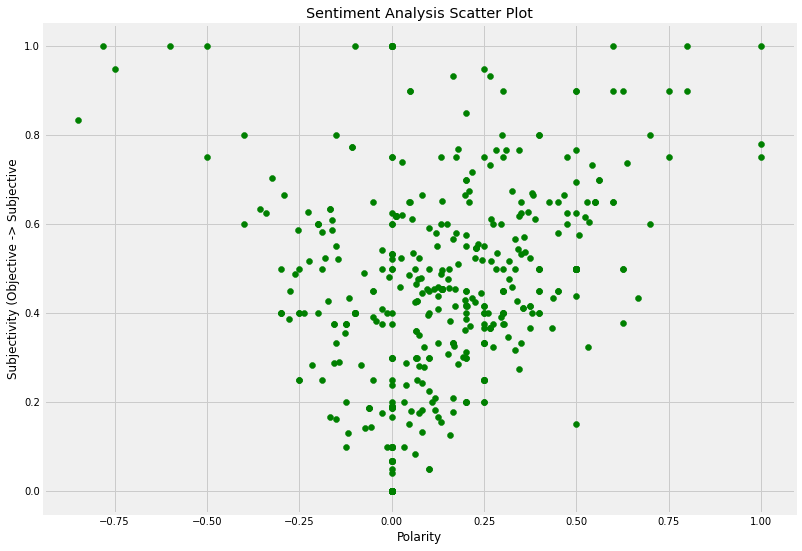

In [18]:
# Create a scatter plot to show the subjectivity and polarity
plt.figure(figsize = (12,9))
for i in range(0, Covid_df.shape[0]):
  plt.scatter(Covid_df['Polarity'][i], Covid_df['Subjectivity'][i], color = 'green')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity (Objective -> Subjective')
plt.show()

In [19]:
# Count the number of Positive, Negative, and Neutral Tweets
Covid_df['Sentiment'].value_counts()

Positive    298
Neutral     240
Negative     91
Name: Sentiment, dtype: int64

In [20]:
# Calculate the Percentage of Positive, Negative, and Neutral Tweets
Neu_Twt = round((230/624*100),1)
Pos_Twt = round((292/624*100),1)
Neg_Twt = round((102/624*100),1)

In [21]:
# Calculate the percentage of Positive, Negative, and Neutral Tweets
print("There are {} % neutral, {} % positive and {} % negative tweets".format(Neu_Twt, Pos_Twt, Neg_Twt))

There are 36.9 % neutral, 46.8 % positive and 16.3 % negative tweets


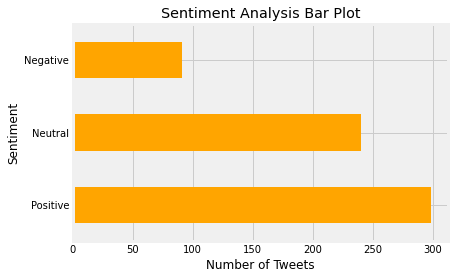

In [22]:
# Create a barchart to show the Positive, Neutral, and Negative sentiments
Covid_df['Sentiment'].value_counts().plot(kind = 'barh', color = 'orange')
plt.title('Sentiment Analysis Bar Plot')
plt.ylabel('Sentiment')
plt.xlabel('Number of Tweets')
plt.show()

In [24]:
# Gather the words for tweets with positive sentiment
Pos_text = " ".join(review for review in Covid_df[Covid_df['Sentiment']=='Positive'].Cleaned_tweets.astype(str))

In [41]:
print ("There are {} positive sentiment words in the combination of all cells in column Cleaned_tweets.".format(len(Pos_text)))

There are 55873 positive sentiment words in the combination of all cells in column Cleaned_tweets.


In [28]:
stopwords = set(STOPWORDS)

In [29]:
stopwords.update(["around", "re", "new", "Average", "many", "1st", "Dr", "far", "may", "Non", "One", "ABC", "made", "COVID", "week", "among", "see", "back", "keep", "got", "come", "going", "said", "say", "today", "month", "next", "still", "three", "make", "says", "tell", "fall", "taking", "need", "day", "staff", "already", "way", "much", "take", "others", "July 16th", "via","two", 'Let', "yet", "see", "go", "Use", "form", "give", "amp", "will", "us"])

In [30]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=600, height=400, max_font_size=118, random_state=21).generate(Pos_text)

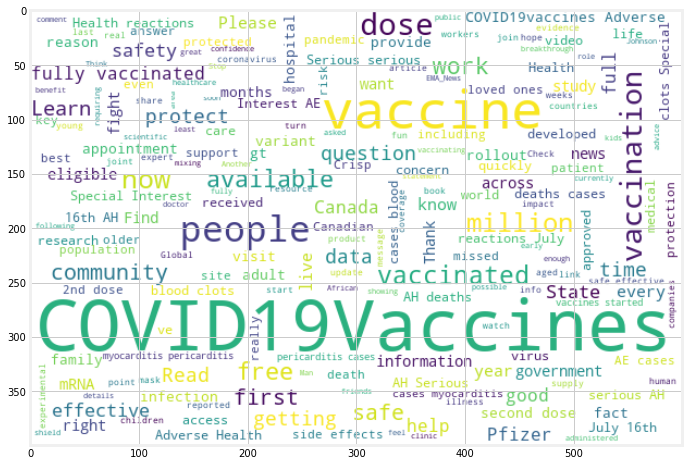

In [31]:
# Create Word Cloud for positive sentiment tweets
plt.figure(figsize=(12,8))

plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

In [32]:
# Gather the words for tweets with negative sentiment
Neg_text = " ".join(review for review in Covid_df[Covid_df['Sentiment']=='Negative'].Cleaned_tweets.astype(str))

In [42]:
print ("There are {} negative sentiment words in the combination of all cells in column Cleaned_tweets.".format(len(Neg_text)))

There are 16644 negative sentiment words in the combination of all cells in column Cleaned_tweets.


In [33]:
wordcloud_N = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(Neg_text)

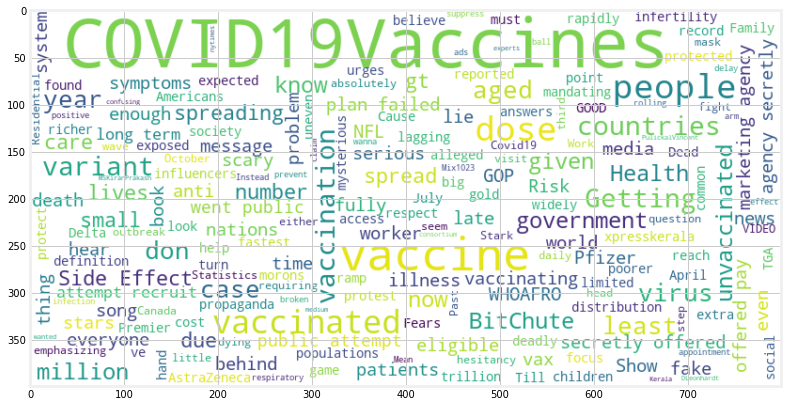

In [34]:
# Create Word Cloud for nagative sentiment tweets
plt.figure(figsize=(12,8))

plt.imshow(wordcloud_N, interpolation='bilinear')

plt.show()